In [10]:
from coralModel import Reef
from coralModel import Organism
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import tools as tl

from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

## Set Parameters

In [2]:
## What needs to be set
NumberOfSimulations = 100
dt=.01
tf=1

coralPercent = .5
algaePercent = .25
r=1.0
d=.4
a=.2
g=.9
y=.75

rows = 10
columns = 10

## Set up based on above
NumberOfRuns = int(tf/dt)
turfPercent = 1 - coralPercent - algaePercent
NumberOfNodes = rows * columns
coralCount = np.zeros((NumberOfRuns, NumberOfSimulations))
turfCount = np.zeros((NumberOfRuns, NumberOfSimulations))
algaeCount = np.zeros((NumberOfRuns, NumberOfSimulations))
types = np.zeros((NumberOfRuns, NumberOfNodes, NumberOfSimulations))

In [3]:
NumberOfRuns = 100
NumberOfSimulations = 100
coralPercent = .5
algaePercent = .25
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4
a=.2
g=.3
y=.75
dt=.01

rows = 10
columns = 10

NumberOfNodes = rows * columns
coralCount = np.zeros((NumberOfRuns, NumberOfSimulations))
turfCount = np.zeros((NumberOfRuns, NumberOfSimulations))
algaeCount = np.zeros((NumberOfRuns, NumberOfSimulations))
types = np.zeros((NumberOfRuns, NumberOfNodes, NumberOfSimulations))

In [ ]:
algaeCount

## Generate square 8x8 reef with randomly assigned types

In [4]:
#0 = Coral, 1 = Turf, 2 = Algae
Moorea = Reef()
count = 0
for i in range(0,rows):
    for j in range(0, columns):
        U = np.random.choice([0,1,2],
                             p=[coralPercent, turfPercent, algaePercent])
        node = Organism(type=U, location=[i,j], ID=count)
        Moorea.append(node)
        count = count + 1
Moorea.generateGraph()

## Run model

In [5]:
for s in range(0,NumberOfSimulations):    
    for n in range(0,NumberOfRuns):
        for i,val in enumerate(Moorea.nodes):
            types[n,i,s] = Moorea.nodes[i].type
        coralCount[n,s] = np.count_nonzero(types[n,:,s] == 0)
        turfCount[n,s] = np.count_nonzero(types[n,:,s] == 1)
        algaeCount[n,s] = np.count_nonzero(types[n,:,s] == 2)
        Moorea.roll(r=r, d=d, a=a, g=g, y=y, dt=dt)

### Run model with new grid each run

In [ ]:
length = 10
width = 10

for s in range(0,NumberOfSimulations):

#Generate square 8x8 reef with randomly assigned types
#0 = Coral, 1 = Turf, 2 = Algae
    Moorea = Reef()
    count = 0
    for i in range(0,length):
        for j in range(0, width):
            U = np.random.choice([0,1,2],
                                 p=[coralPercent, turfPercent, algaePercent])
            node = Organism(type=U, location=[i,j], ID=count)
            Moorea.append(node)
            count = count + 1
    Moorea.generateGraph()
    #NumberOfNodes = count

#Run model
    for n in range(0,NumberOfRuns):
        for i,val in enumerate(Moorea.nodes):
            types[n,i,s] = Moorea.nodes[i].type
        coralCount[n,s] = np.count_nonzero(types[n,:,s] == 0)
        turfCount[n,s] = np.count_nonzero(types[n,:,s] == 1)
        algaeCount[n,s] = np.count_nonzero(types[n,:,s] == 2)
        Moorea.roll(r=r, d=d, a=a, g=g, y=y, dt=dt)


## Plotting inital and last spatial distribution of model runs

In [ ]:
##initial
data1 = np.reshape(types[0,:,0], (-1, rows))
##final
data2 = np.reshape(types[NumberOfRuns-1,:,0], (-1, rows))
##plot
tl.initialFinal(data1=data1, data2=data2) 


np.savetxt("modelOutput_shifting_Equal_.csv", np.reshape(types[i,:,1], (-1, rows)), delimiter=",")

## Animation

In [ ]:

#https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
%matplotlib inline
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
np.reshape(types[i,:,1], (-1, rows))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


fig = plt.figure("Moving Wavepackage")
colors = ['pink', 'lightgreen','darkgreen']
levels = [0, 1, 2]
cmap, norm = clt.from_levels_and_colors(levels=levels,
                                        colors=colors, 
                                        extend='max')

Z   = []
img = []
for i in range(NumberOfRuns):
    Z.append(np.reshape(types[i,:,1], (-1, rows)))
    img.append([plt.imshow(Z[i], cmap=cmap, norm=norm)])

ani = animation.ArtistAnimation(fig, img, interval=200, blit=True,repeat_delay=0)

HTML(ani.to_html5_video())

#### Save Animation

In [ ]:
ani.save('./animation.gif', writer='imagemagick', fps=60)

## Plotting Historgrams:

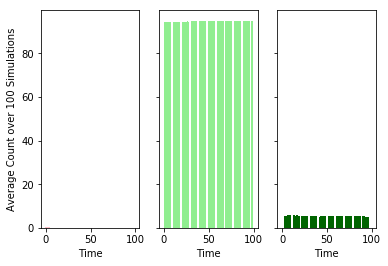

In [6]:
x = np.arange(NumberOfRuns)
ylabel = "Average Count over 100 Simulations"
#plot
tl.averageHists(x, coralCount, turfCount, algaeCount, ylabel) 

In [7]:
fig, (ax, ax2, ax3) = plt.subplots(1,3, facecolor = 'w', sharey='row')
x = np.arange(NumberOfRuns)
im = ax.plot(x, coralCount.mean(axis=1), color='red')
im = ax.plot(x, coralCount.max(axis=1), color='red')
im = ax.plot(x, coralCount.min(axis=1), color='red')

im2 = ax2.plot(x, turfCount.mean(axis=1), color='blue')
im2 = ax2.plot(x, turfCount.max(axis=1), color='blue')
im2 = ax2.plot(x, turfCount.min(axis=1), color='blue')

im2 = ax3.plot(x, algaeCount.mean(axis=1), color='green')
im2 = ax3.plot(x, algaeCount.max(axis=1), color='green')
im2 = ax3.plot(x, algaeCount.min(axis=1), color='green')



ax.set_ylabel("Average Count over 100 Simulations")
ax.set_xlabel("Time")
ax2.set_xlabel("Time")
ax3.set_xlabel("Time")
ax.set_facecolor('white')
ax2.set_facecolor('white')
ax3.set_facecolor('white')

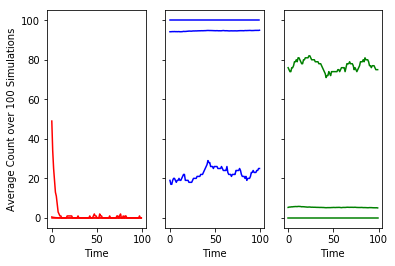

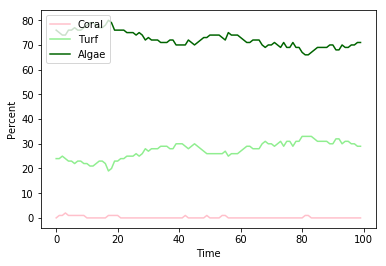

In [8]:
#Plotting progression over time for 1 simulation
x1=coralCount[:,1]
x2=turfCount[:,1]
x3=algaeCount[:,1]
tl.timeSeries(x, x1,x2,x3)

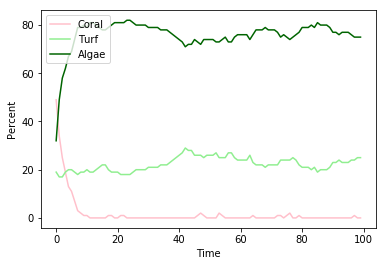

In [9]:
#Plotting progression over time for 1 simulation
x1=coralCount[:,0]
x2=turfCount[:,0]
x3=algaeCount[:,0]
tl.timeSeries(x, x1,x2,x3)

# Begin TDA

#### Steps
* Set values to 1 = Coral, 0 = Other
* create a finer grid
* use gaussians at each node to create variation based on overlap
* Do TDA on output 


In [ ]:
from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import ndimage
import PIL

### Make Binary (including inverse (i)) and refine grid

In [ ]:
tester, testeri = tl.tda_prep(types[999,:,1], columns, rows, 8, True)

### Add texture (empasize larger patches)

In [ ]:
yo = ndimage.distance_transform_edt(tester)
yoi = ndimage.distance_transform_edt(testeri)

### Run TDA
RE [Ripser](https://ripser.scikit-tda.org/Lower%20Star%20Image%20Filtrations.html) approach

In [ ]:
prep = tl.prep2(yo)
prepi = tl.prep2(yoi)

#RUN Lower Star Algorithm
dgm = lower_star_img(-prep)
dgmi = lower_star_img(-prepi)

#Grab points above a threshold
threshold = 4
points = tl.pointDef(dgm, threshold)
pointsi = tl.pointDef(dgmi, threshold)


In [ ]:
### can already grab number of patches here with 
points.shape[0]

### Plot output

In [ ]:
tl.plotTDA(points, yo, prep, dgm)

In [ ]:
tl.plotTDA(pointsi, yoi, prepi, dgmi)

In [ ]:
tester, testeri = tl.tda_prep(types[0,:,1], columns, rows, 8, True)
yo = ndimage.distance_transform_edt(tester)
yoi = ndimage.distance_transform_edt(testeri)
prep = tl.prep2(yo)
prepi = tl.prep2(yoi)

#RUN Lower Star Algorithm
dgm = lower_star_img(-prep)
dgmi = lower_star_img(-prepi)

#Grab points above a threshold
threshold = 8
points = tl.pointDef(dgm, threshold)
pointsi = tl.pointDef(dgmi, threshold)

tl.plotTDA(points, yo, prep, dgm)

In [ ]:
tl.plotTDA(pointsi, yoi, prepi, dgmi)

--------

--------

--------

--------

--------

--------

--------

Proximity of Patches less relevant? looking at neighbour relations, not global